## NYC Taxi Challenge

### Data fields
- id - a unique identifier for each trip
- vendor_id - a code indicating the provider associated with the trip record
- pickup_datetime - date and time when the meter was engaged
- dropoff_datetime - date and time when the meter was disengaged
- passenger_count - the number of passengers in the vehicle (driver entered value)
- pickup_longitude - the longitude where the meter was engaged
- pickup_latitude - the latitude where the meter was engaged
- dropoff_longitude - the longitude where the meter was disengaged
- dropoff_latitude - the latitude where the meter was disengaged
- store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
- trip_duration - duration of the trip in seconds

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_taxi = pd.read_csv("train.csv")

In [4]:
df_taxi.shape

(1458644, 11)

In [5]:
df_taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### 1. la vitesse moyenne de chaque trajet

- 1. méthode Haversine (ce que j'utilise)
- 2. geopy : https://geopy.readthedocs.io/en/stable/

In [5]:
# calculer le km parcourus de chaque trajet
# la distance est en kilomètre

from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
def calcul_distance(geo):
    R = 6373.0

    lat1 = radians(geo[1])
    lat2 = radians(geo[3])
    lon1 = radians(geo[0])
    lon2 = radians(geo[2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [6]:
l_distance = []
for i in df_taxi[["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"]].values:
    #print(i)
    dist = calcul_distance(i)
    l_distance.append(dist)
    
len(l_distance)

1458640

In [7]:
df_taxi["distance"]=l_distance

In [9]:
df_taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498991
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.806074
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.387103
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485965
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188962


In [8]:
df_taxi["trip_duration_h"]=df_taxi["trip_duration"]/3600

In [9]:
df_taxi["vitesse_m_km_h"]=df_taxi["distance"]/df_taxi["trip_duration_h"]

In [12]:
df_taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,trip_duration_h,vitesse_m_km_h
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498991,0.126389,11.860150
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.806074,0.184167,9.806736
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.387103,0.590000,10.825598
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485965,0.119167,12.469634
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188962,0.120833,9.839682


In [67]:
df_taxi.vitesse_m_km_h.sort_values()#.tail(15)

1063994       0.000000
658594        0.000000
158428        0.000000
985437        0.000000
476109        0.000000
              ...     
377068     4087.994931
974378     5252.664405
184925     5642.264663
910072     6879.499358
1176337    9277.748311
Name: vitesse_m_km_h, Length: 1458644, dtype: float64

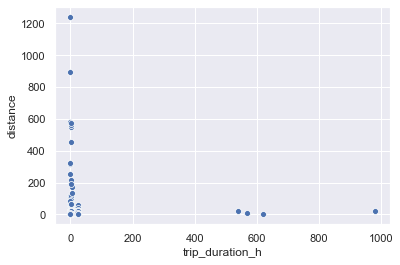

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

'''x=df_taxi["trip_duration_h"]
y=df_taxi["distance"]
ax = sns.scatterplot(x=x, y=y, data=df_taxi)'''

Text(0.5, 1.0, 'Speed')

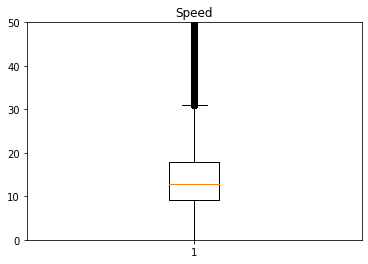

In [124]:
plt.boxplot([df_taxi["vitesse_m_km_h"]])
plt.ylim(0,50)
plt.title("Speed")

(0, 3000)

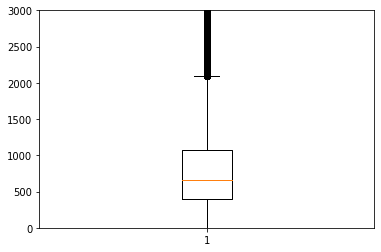

In [130]:
plt.boxplot([df_taxi["trip_duration"]])
plt.ylim(0,3000)

In [132]:
df_taxi[df_taxi["trip_duration_h"]>100]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,trip_duration_h,vitesse_m_km_h,weekday_pickup,geom,hour_pickup,hour_class
355003,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,1939736,20.154989,538.815556,0.037406,1,"40.64355850219727,-73.7896499633789",0,"(-1, 3]"
680594,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,2049578,5.984365,569.327222,0.010511,5,"40.735252380371094,-73.92167663574219",22,"(19, 23]"
924150,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,2227612,1.635641,618.781111,0.002643,1,"40.74232482910156,-73.9837875366211",6,"(3, 7]"
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282,19.906909,979.522778,0.020323,5,"40.64863204956055,-73.78390502929686",22,"(19, 23]"


### Graphe distance par apport à la durée du trajet

In [10]:
df_taxi = df_taxi.drop([df_taxi.index[355003] , df_taxi.index[680594], df_taxi.index[924150], df_taxi.index[978383]])

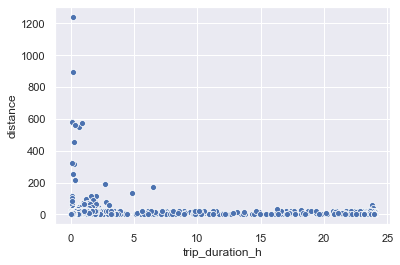

In [134]:
x=df_taxi["trip_duration_h"]
y=df_taxi["distance"]
ax = sns.scatterplot(x=x, y=y, data=df_taxi)

In [11]:
#df_taxi_clean = df_taxi_clean.where(df_taxi_clean['distance']<200)
df_taxi = df_taxi[df_taxi["distance"]<200]

In [143]:
df_taxi[df_taxi["trip_duration_h"]>200]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,trip_duration_h,vitesse_m_km_h,weekday_pickup,geom,hour_pickup,hour_class


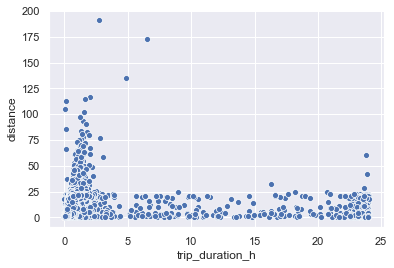

In [144]:
x=df_taxi["trip_duration_h"]
y=df_taxi["distance"]
ax = sns.scatterplot(x=x, y=y, data=df_taxi_clean)

### 2. le nombre de trajets effectués en fonction du jour de la semaine

Pour transformer le string en date

https://www.pierre-giraud.com/python-apprendre-programmer-cours/module-datetime-time-calendar/

In [13]:
import datetime

In [103]:
time_pickup = pd.to_datetime(df_taxi["pickup_datetime"])

In [104]:
time_pickup = pd.DatetimeIndex(time_pickup)

In [105]:
weekday_pickup = time_pickup.weekday

In [106]:
df_taxi["weekday_pickup"]=weekday_pickup

In [107]:
# nb_trajet/jour de la semain

nb_journey_per_day_of_w = df_taxi.groupby("weekday_pickup")["id"].count()

In [108]:
nb_journey_per_day_of_w

weekday_pickup
0    187418
1    202749
2    210136
3    218574
4    223533
5    220868
6    195366
Name: id, dtype: int64

In [25]:
df_taxi["weekday_pickup"].value_counts().sort_index()

0    187418
1    202749
2    210136
3    218574
4    223533
5    220868
6    195366
Name: weekday_pickup, dtype: int64

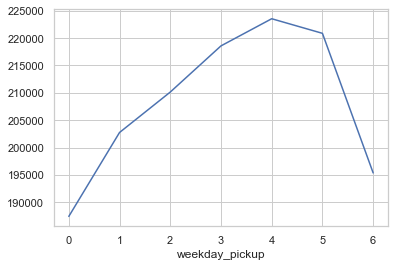

In [68]:
x=nb_journey_per_day_of_w.index
y=nb_journey_per_day_of_w.values
ax = sns.lineplot(x=x, y=y, data=df_taxi)

# 0=lundi 1=mardi 2=mercredi, etc

### 3. le nombre de trajets effectués en fonction de l’horaire de la journée par tranche de 4h.

In [109]:
hour_pickup = time_pickup.hour

In [110]:
df_taxi["hour_pickup"]=hour_pickup

In [111]:
df_taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,trip_duration_h,vitesse_m_km_h,weekday_pickup,geom,hour_pickup
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498991,0.126389,11.860150,0,"40.76793670654297,-73.98215484619139",17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.806074,0.184167,9.806736,6,"40.738563537597656,-73.98041534423827",0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.387103,0.590000,10.825598,1,"40.763938903808594,-73.97902679443358",11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485965,0.119167,12.469634,2,"40.719970703125,-74.01004028320312",19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188962,0.120833,9.839682,5,"40.79320907592773,-73.97305297851562",13


In [ ]:
'''x=df_taxi["hour"]
y=df_taxi["vitesse_m_km_h"]

ax = sns.scatterplot(x=x, y=y, data=df_reduced)'''

In [112]:
nb_journey_per_hour = df_taxi.hour_pickup.value_counts()
nb_journey_per_hour

18    90600
19    90308
21    84185
20    84072
22    80492
17    76483
14    74292
12    71873
15    71811
13    71473
23    69785
11    68476
9     67663
8     67053
10    65437
16    64313
7     55600
0     53248
1     38571
6     33248
2     27972
3     20895
4     15792
5     15002
Name: hour_pickup, dtype: int64

In [113]:
df_taxi["hour_class"] = pd.cut(df_taxi["hour_pickup"],[4*i-1 for i in range(7)])

In [114]:
nb_journey_per_4h = df_taxi.hour_class.value_counts().sort_index()

In [115]:
nb_journey_per_4h

(-1, 3]     140686
(3, 7]      119642
(7, 11]     268629
(11, 15]    289449
(15, 19]    321704
(19, 23]    318534
Name: hour_class, dtype: int64

In [58]:
print(nb_journey_per_4h.index)
print(nb_journey_per_4h.values)

CategoricalIndex([(-1, 3], (3, 7], (7, 11], (11, 15], (15, 19], (19, 23]], categories=[(-1, 3], (3, 7], (7, 11], (11, 15], (15, 19], (19, 23]], ordered=True, dtype='category')
[140686 119642 268629 289449 321704 318534]


In [116]:
df_taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,trip_duration_h,vitesse_m_km_h,weekday_pickup,geom,hour_pickup,hour_class
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498991,0.126389,11.860150,0,"40.76793670654297,-73.98215484619139",17,"(15, 19]"
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.806074,0.184167,9.806736,6,"40.738563537597656,-73.98041534423827",0,"(-1, 3]"
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.387103,0.590000,10.825598,1,"40.763938903808594,-73.97902679443358",11,"(7, 11]"
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485965,0.119167,12.469634,2,"40.719970703125,-74.01004028320312",19,"(15, 19]"
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188962,0.120833,9.839682,5,"40.79320907592773,-73.97305297851562",13,"(11, 15]"


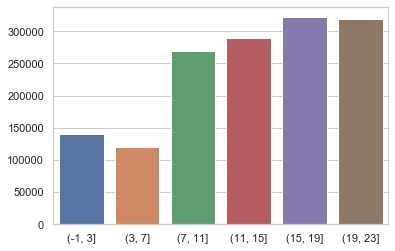

In [59]:
sns.set(style="whitegrid")

x=nb_journey_per_4h.index
y=nb_journey_per_4h.values
ax = sns.barplot(x=x, y=y, data=df_taxi)

In [ ]:
### méthode de Ludivine


def tranche(heure):
    h = datetime.time(format_time(heure)).hour
    t = "none"
    if 0<=h<4:
        t = "00-03h59"
    elif 4<=h<8:
        t="04h-07h59"
    elif 8<=h<12:
        t="8h-11h59"
    elif 12<=h<16:
        t="12h-15h59"
    elif 16<=h<20:
        t="16h-19h59"
    else:
        t="20h-23h59"
    return t

# ensuite apply cette fonction

### 4. le nombre de km parcourus par jour de la semaine

In [61]:
km_per_day = df_taxi.groupby("weekday_pickup")["distance"].sum()

In [62]:
km_per_day

weekday_pickup
0    668691.964864
1    678541.037481
2    703139.457087
3    747912.341934
4    758962.652020
5    736642.307692
6    726681.299823
Name: distance, dtype: float64

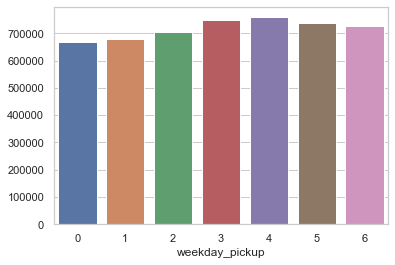

In [64]:
sns.set(style="whitegrid")

x=km_per_day.index
y=km_per_day.values
ax = sns.barplot(x=x, y=y, data=df_taxi)

NameError: name 'df_taxi' is not defined

### Mon test pour ajouetr place_id dans le DF

Pas réussi de les ajouter pour le df complet, error : out of run time

In [26]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [27]:
from geopy.geocoders import Nominatim

#### Test pour trouver 1 place_id de la 1ère ligne dans le df

docs pour réaliser :

https://pypi.org/project/geopy/

https://towardsdatascience.com/reverse-geocoding-in-python-a915acf29eb6


In [77]:
locator = Nominatim(user_agent="myGeocoder")

In [31]:
df_taxi.pickup_longitude[0]

-73.98215484619139

In [32]:
df_taxi.pickup_latitude[0]

40.76793670654297

In [44]:
location = geolocator.reverse("40.767937, -73.982155")

In [45]:
print(location.address)

Columbus Circle, Manhattan Community Board 4, New York, Manhattan, New York County, New York, United States of America


In [47]:
print(location.raw['place_id'])

235666615


In [50]:
df_test = df_taxi[0:5]

#### 2e lien pour combiner latitude et longtitude ensemble

In [72]:
pip install plotly_express==0.4.0


  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=a6e302b754aa4113e961aae8411e59042027a406b2167b9496ec3397a2e4fd3a
  Stored in directory: c:\users\utilisateur\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [97]:
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

In [78]:
import plotly_express as px
px.scatter_mapbox(df_test, lat="pickup_latitude", lon="pickup_longitude", zoom=15)

In [80]:
df_test["geom"] = df_test["pickup_latitude"].map(str) + ',' + df_test["pickup_longitude"].map(str)
df_test["geom"][0]

C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'40.76793670654297,-73.98215484619139'

In [81]:
locator = Nominatim(user_agent="myGeocoder")

rgeocode = RateLimiter(locator.reverse, min_delay_seconds=0.001)

In [94]:
def find_place_id(i):
    locator = Nominatim(user_agent="myGeocoder")
    location = geolocator.reverse(i)
    return location.raw['place_id']

In [95]:
df_test["place_id"] = df_test["geom"].apply(find_place_id)

C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [96]:
df_test

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,trip_duration_h,vitesse_m_km_h,weekday_pickup,geom,place_id
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498991,0.126389,11.860150,0,"40.76793670654297,-73.98215484619139",235666615
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.806074,0.184167,9.806736,6,"40.738563537597656,-73.98041534423827",27891882
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.387103,0.590000,10.825598,1,"40.763938903808594,-73.97902679443358",149611720
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485965,0.119167,12.469634,2,"40.719970703125,-74.01004028320312",26104137
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188962,0.120833,9.839682,5,"40.79320907592773,-73.97305297851562",19978626


In [86]:
df_test.place_id[0]

Location(Columbus Circle, Manhattan Community Board 4, New York, Manhattan, New York County, New York, United States of America, (40.76810475, -73.98178766482357, 0.0))

In [88]:
location = geolocator.reverse(df_test["geom"][0])

In [89]:
print(location.raw['place_id'])

235666615


#### Généraliser dans le df complet

In [120]:
df_taxi["geom"] = df_taxi["pickup_latitude"].map(str) + ',' + df_taxi["pickup_longitude"].map(str)
df_taxi["geom"][0]

'40.76793670654297,-73.98215484619139'

In [121]:
df_taxi["place_id"] = df_taxi["geom"].apply(find_place_id)

GeocoderTimedOut: Service timed out

In [122]:
df_taxi

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,trip_duration_h,vitesse_m_km_h,weekday_pickup,geom,hour_pickup,hour_class
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498991,0.126389,11.860150,0,"40.76793670654297,-73.98215484619139",17,"(15, 19]"
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.806074,0.184167,9.806736,6,"40.738563537597656,-73.98041534423827",0,"(-1, 3]"
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.387103,0.590000,10.825598,1,"40.763938903808594,-73.97902679443358",11,"(7, 11]"
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485965,0.119167,12.469634,2,"40.719970703125,-74.01004028320312",19,"(15, 19]"
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188962,0.120833,9.839682,5,"40.79320907592773,-73.97305297851562",13,"(11, 15]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,1.225465,0.216111,5.670531,4,"40.745521545410156,-73.9822006225586",13,"(11, 15]"
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6.051735,0.181944,33.261443,6,"40.74737930297852,-74.00094604492188",7,"(3, 7]"
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,7.827062,0.212222,36.881444,4,"40.768798828125,-73.9591293334961",6,"(3, 7]"
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1.092907,0.103611,10.548163,1,"40.749061584472656,-73.9820785522461",15,"(11, 15]"


### Pour afficher l'endroit de pickup --ludi

In [ ]:
'''import folium

c = folium.Map(location = [df['pickup_latitude'].mean(), df['pickup_longitude'].mean()])

 

for i in range(5):
    lat = df['pickup_latitude'][i]
    long = df['pickup_longitude'][i]
    folium.Circle([lat, long], radius=100).add_to(c)
c.save('maCarte1.html')
c'''

In [13]:
df_taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,trip_duration_h,vitesse_m_km_h
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498991,0.126389,11.860150
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.806074,0.184167,9.806736
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.387103,0.590000,10.825598
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485965,0.119167,12.469634
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188962,0.120833,9.839682


In [ ]:
pd.get_dummies(df_taxi, prefix=['col1', 'col2'])